In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split

trainD = pd.read_csv('train.csv')
testD = pd.read_csv('test.csv')
actual_price = pd.read_csv('sample_submission.csv')

In [11]:
data_train = trainD
select = ['MSSubClass','LotConfig','OverallQual','GrLivArea','TotalBsmtSF','BsmtFinSF1','2ndFlrSF','GarageArea','1stFlrSF','YearBuilt']
data_train = data_train[select]
data_train

,MSSubClass,LotConfig,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,60,Inside,7,1710,856,706,854,548,856,2003
1,20,FR2,6,1262,1262,978,0,460,1262,1976
2,60,Inside,7,1786,920,486,866,608,920,2001
3,70,Corner,7,1717,756,216,756,642,961,1915
4,60,FR2,8,2198,1145,655,1053,836,1145,2000
...,...,...,...,...,...,...,...,...,...,...
1455,60,Inside,6,1647,953,0,694,460,953,1999
1456,20,Inside,6,2073,1542,790,0,500,2073,1978
1457,70,Inside,7,2340,1152,275,1152,252,1188,1941
1458,20,Inside,5,1078,1078,49,0,240,1078,1950


In [12]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['LotConfig'])
X=one_hot_encoded_data
X

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,7,1710,856,706,854,548,856,2003,0,0,0,0,1
1,20,6,1262,1262,978,0,460,1262,1976,0,0,1,0,0
2,60,7,1786,920,486,866,608,920,2001,0,0,0,0,1
3,70,7,1717,756,216,756,642,961,1915,1,0,0,0,0
4,60,8,2198,1145,655,1053,836,1145,2000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,1647,953,0,694,460,953,1999,0,0,0,0,1
1456,20,6,2073,1542,790,0,500,2073,1978,0,0,0,0,1
1457,70,7,2340,1152,275,1152,252,1188,1941,0,0,0,0,1
1458,20,5,1078,1078,49,0,240,1078,1950,0,0,0,0,1


In [13]:
Y = trainD['SalePrice']
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [30]:
# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

X_train = X[0:1167]
X_test = X[1167:1460]
y_train = Y[0:1167]
y_test = Y[1167:1460]

In [31]:
y_test

1167    173000
1168    235000
1169    625000
1170    171000
1171    163000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 293, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:

from sklearn.tree import DecisionTreeRegressor
class multivariate_linear_reg:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
        y_test_predict = self.predict()
        
        # self.plot(y_test, y_test_predict)
        self.plot_(y_test, y_test_predict)
        self.error(y_test_predict)
        print()
        
    def predict(self):
#         # apply the model
#         lr_method = LinearRegression()
#         lr_method.fit(self.x_train, self.y_train)
        
#         # get the predict result
#         y_test_predict = lr_method.predict(self.x_test)
        treeModel = DecisionTreeRegressor()
        treeModel = treeModel.fit(self.x_train, self.y_train)
        y_test_predict = treeModel.predict(self.x_test)

        
        return y_test_predict
    
    def plot(self,y_test, y_test_predict):
     
        test_dates = self.x_test.index     
        
        plt.figure(figsize=(500, 500))
        
        plt.suptitle('Mutiple Linear Regression')
        #plt.plot(test_dates,y_test_predict)
        
        #fig = plt.subplots()
        ax1 = plt.subplots()

        color = 'tab:red'
        #ax1.set_xlabel('test data')
        #ax1.set_ylabel('y_predict', color=color)
        plt.plot(test_dates,y_test_predict, color=color)
        plt.tick_params(axis='y', labelcolor=color)

        ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        #ax2.set_ylabel('actual value', color=color)  # we already handled the x-label with ax1
        ax2.plot(test_dates,y_test, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()
    def plot_(self, y_test, y_test_predict):
        plt.scatter(self.x_test.index ,y_test, color='red')
        plt.plot(self.x_test.index, y_test_predict)
        plt.title("Linear Regression")
        plt.show()
        
    def error(self,y_test_predict):
        # calculact the accuracy
        # the basic formula:  r2 = 1 – (SSres  /SSmean )
        score = r2_score(y_pred = y_test_predict,y_true = self.y_test)
        print ('the r2 score is :', score)
        print('mean_sqrd_error is:',mean_squared_error(y_test_predict, self.y_test))
        print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test_predict, self.y_test)))
        return score
        

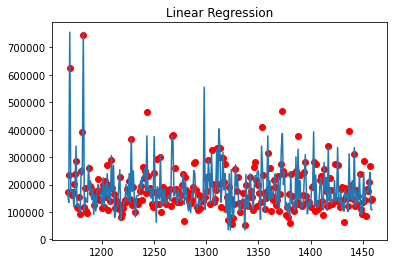

the r2 score is : 0.7248042831149004
mean_sqrd_error is: 1839071058.0784984
root_mean_squared error of is: 42884.39177694489



In [34]:
#call Mutiple linear Regression 
multivariate_linear_reg(X_train,y_train,X_test,y_test)
